In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import torch
from MCMC import MCMC, muller_potential, potential_to_probability
%matplotlib inline

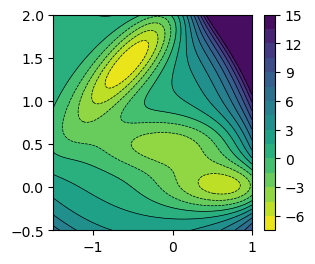

In [2]:
# plot muller potential
kbT = 2.479
x = np.linspace(-1.5, 1, 100)
y = np.linspace(-0.5, 2, 100)
X, Y = np.meshgrid(x, y)
Z = muller_potential([X, Y])
Z[Z>15] = 15
fig, ax = plt.subplots(1, 1, figsize=(3.2, 2.8))
im = ax.contourf(X, Y, Z, 20, cmap=cm.viridis_r)
ax.contour(X, Y, Z, 20, vmax=15, linewidths=0.5, colors='black')
cbar = fig.colorbar(im)

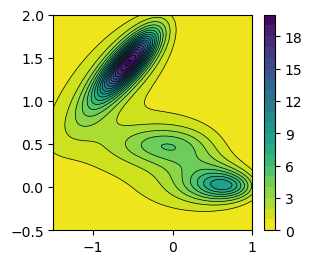

In [3]:
# plot probability density
muller_prob = potential_to_probability(muller_potential, kbT=kbT)
P = muller_prob([X, Y])
fig, ax = plt.subplots(1, 1, figsize=(3.2, 2.8))
im = ax.contourf(X, Y, P, 20, cmap=cm.viridis_r)
ax.contour(X, Y, P, 20, linewidths=0.5, colors='black')
cbar = fig.colorbar(im)

In [4]:
# sample from muller potential
samples = MCMC(muller_prob, 50000, 0.1, [-0.5, 1.5], np.array([[-1.5, 1], [-0.5, 2]]))

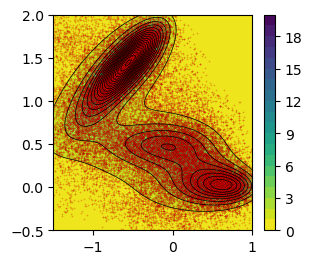

In [5]:
# plot probability density with MCMC samples
fig, ax = plt.subplots(1, 1, figsize=(3.2, 2.8))
im = ax.contourf(X, Y, P, 20, cmap=cm.viridis_r)
ax.contour(X, Y, P, 20, linewidths=0.5, colors='black')
ax.scatter(samples[:, 0], samples[:, 1], s=1, c='red', alpha=0.3, edgecolors='black', linewidths=0.1)
cbar = fig.colorbar(im)